### 1. python解释器

### 2. Ipython

### 3. Tab补全
* 变量不全
* 函数/方法补全
* 路径补全
* 关键字补全

#### 3.1 变量补全

In [2]:
name_age = ["liwen_19","wuyifan_30","zhangyao_23"]

In [5]:
dict_person = {}
# 方法1 
for n in name_age:
    dict_person[n.split("_")[0]] = n.split("_")[1]

In [6]:
dict_person

{'liwen': '19', 'wuyifan': '30', 'zhangyao': '23'}

In [8]:
# 方法2：字典的推导式
dict_person = {n.split("_")[0]:n.split("_")[1] for n in name_age}
dict_person

{'liwen': '19', 'wuyifan': '30', 'zhangyao': '23'}

#### 3.2 函数/方法补全

In [10]:
import datetime

In [11]:
print(datetime.date(2020,3,16))

2020-03-16


In [16]:
date_SARS = datetime.date(2003,12,5)
date_nCov = datetime.date(2019,12,13)
print(date_nCov.__sub__(date_SARS))  # 两个日期相差多少天
# 注意 __sub__ 有两个下划线

5852 days, 0:00:00


#### 3.3 路径补全

In [17]:
path = "/user/liwen/Desktop/"

#### 3.4 关键字补全

In [19]:
def func1(name,age=None):
    print(name)
func1("liwen")

liwen


### 4. 内省

* 在一个变量或者函数前后使用“？”，两个“？”可显示源码

In [20]:
func1?

In [21]:
func1??

### 5. %run

* %run 要运行的文件

### 6. 魔术命令

* https://www.cnblogs.com/bind/p/11958317.html

In [16]:
# 举例，查询CPU运行某个程序需要多长时间
import numpy as np
# 100随机矩阵 点积运算 
a = np.random.randn(100,100)
%time np.dot(a,a)

Wall time: 110 ms


array([[ 11.39329035,   5.1900706 ,  12.21617208, ...,   3.82700767,
         -6.80312973,   2.26773383],
       [-10.95617418,   8.6008006 ,   1.42108139, ...,  -5.15930916,
          8.64827827,  -0.0384659 ],
       [  2.29196166,  19.93808292,  -9.55170968, ...,  13.23126603,
         -9.26387749,  -4.84884222],
       ...,
       [  7.57996002,  19.52521198,   5.19212432, ...,  -5.77532949,
          2.06798797, -11.32071789],
       [ -3.39229107,  19.60836016,  21.30271432, ..., -14.67429978,
         13.08780285,   7.07105944],
       [  1.42474067,  -9.47698914,  -2.30796694, ..., -10.71662819,
         -7.18493746,  14.53372113]])

In [17]:
import requests
from lxml import etree
import pandas as pd

In [18]:
# requests爬取网页
url = ("https://www.cnblogs.com/bind/p/11958317.html")
response = requests.get(url)

# etree html语法纠正,对文本进行自动修正
response_elements = etree.HTML(response.text)

# //*[@id="cnblogs_post_body"]/table[1]

# xpath定位(与另一门选修课《web数据挖掘》相关)
table_magic = response_elements.xpath("//*[@id=\"cnblogs_post_body\"]/table[1]")
table = etree.tostring(table_magic[0],encoding='utf-8').decode()
# etee.tostring()输出修正后的结果，类型是bytes

# pd表格输出csv
df = pd.read_html(table,encoding='utf-8',header=0)[0]
results = list(df.T.to_dict().values())
df.to_csv("magic_table.csv",index=False)   # df.to_csv(相对位置，保存在当前路径下

# pd读取csv
magic_data = pd.read_csv("magic_table.csv")
print("\033[1;31m魔术命令-Line magics\033[0m")
magic_data

# python颜色： \033[显示方式：前景色；背景色m+结尾部分： \033[0m
# 显示方式： 0（默认\）、1（高亮）、22（非粗体）、4（下划线）、24（非下划线）、 5（闪烁）、25（非闪烁）、7（反显）、27（非反显）
# #前景色:   30（黑色）、31（红色）、32（绿色）、 33（黄色）、34（蓝色）、35（洋 红）、36（青色）、37（白色）
#背景色:   40（黑色）、41（红色）、42（绿色）、 43（黄色）、44（蓝色）、45（洋 红）、46（青色）、47（白色）


魔术命令-Line magics


,命令,详情
0,%alias,定义别名
1,%alias_magic,为现有的魔术命令创建别名
2,%autocall,%autocall
3,%automagic,设置输入魔术命令时是否键入%前缀，on(1)/off(0)
4,%bookmark,管理IPython的书签系统
5,%cd,更改当前工作目录
6,%colors,%colors
7,%config,%config
8,%debug,%debug
9,%dhist,打印历史访问目录


In [19]:
table_magic_2 = response_elements.xpath("//*[@id=\"cnblogs_post_body\"]/table[2]")
table_2 = etree.tostring(table_magic_2[0],encoding='utf-8').decode()

# pd表格输出csv
df_2 = pd.read_html(table_2,encoding='utf-8',header=0)[0]
results = list(df_2.T.to_dict().values())
df_2.to_csv("magic_table_2.csv",index=False)

# pd读取csv
magic_data_2 = pd.read_csv("magic_table_2.csv")

print("\033[1;32m魔术命令-打印相关\033[0m")
magic_data_2

魔术命令-打印相关


,命令,详情
0,%pdef,打印任何可调用对象信息
1,%pdoc,打印对象的docstring
2,%pfile,%pfile
3,%pinfo,%pinfo
4,%pinfo2,%pinfo2
5,%pip,运行pip命令
6,%popd,%popd
7,%pprint,美化打印
8,%precision,设置美化打印时的浮点数精度
9,%profile,打印您当前活动的IPython配置文件


In [20]:
table_magic_3 = response_elements.xpath("//*[@id=\"cnblogs_post_body\"]/table[3]")
table_3 = etree.tostring(table_magic_3[0],encoding='utf-8').decode()

# pd表格输出csv
df_3 = pd.read_html(table_3,encoding='utf-8',header=0)[0]
results = list(df_3.T.to_dict().values())
df_3.to_csv("magic_table_3.csv",index=False)

# pd读取csv
magic_data_3 = pd.read_csv("magic_table_3.csv")
print("\033[1;34m魔术命令-运行相关\033[0m")
magic_data_3

魔术命令-运行相关


,命令,详情
0,%reload_ext,通过其模块名称重新加载IPython扩展
1,%rerun,%rerun
2,%reset,%reset
3,%reset_selective,%reset_selective
4,%run,%run
5,%save,%save
6,%sc,%sc
7,%set_env,设置环境变量
8,%sx,%sx
9,%system,%system


###  7. matplotlib

* matplotlib是python的2D绘图库。
* 在绘图结构中，figure创建窗口，subplot创建子图，所有绘画只能在子图上进行
* plt表示当前子图，若没有就创建一个子图
* Figure：面板(图)，matplotlib中的所有图像都是位于figure对象中，一个图像只能有一个figure对象
* Subplot：子图，figure对象下创建一个或多个subplot对象(即axes)用于绘制图像

#### 配置参数
* axex: 设置坐标轴边界和表面的颜色、坐标刻度值大小和网格的显示
* figure: 控制dpi、边界颜色、图形大小、和子区( subplot)设置
* font: 字体集（font family）、字体大小和样式设置
* grid: 设置网格颜色和线性
* legend: 设置图例和其中的文本的显示
* line: 设置线条（颜色、线型、宽度等）和标记
* patch: 是填充2D空间的图形对象，如多边形和圆。控制线宽、颜色和抗锯齿设置等。
* savefig: 可以对保存的图形进行单独设置。例如，设置渲染的文件的背景为白色。
* verbose: 设置matplotlib在执行期间信息输出，如silent、helpful、debug和debug-annoying。
* xticks和yticks: 为x,y轴的主刻度和次刻度设置颜色、大小、方向，以及标签大小。

#### 线条风格linestyle或ls
* ‘-‘:实线
* ‘:’:虚线
* ‘–’:破折线
* ‘None’/’‘,’’:什么都不画
* ‘-.’	点划线

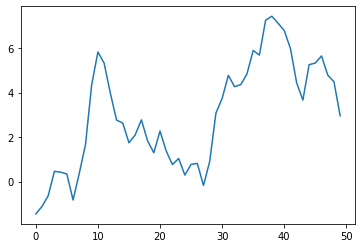

In [22]:
import numpy as np  # 必须引入此模块，否则程序会报错，个人的jupyter notebook问题
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.plot(np.random.randn(50).cumsum())   # 绘制子坐标系

Text(0.5, 0, 'Stages')

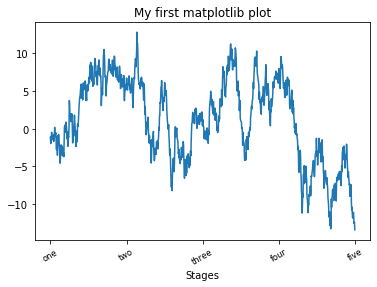

In [23]:
fig = plt.figure()   # 开启一个窗口
ax = fig.add_subplot(1,1,1)  # 创建子图，参数：行数、列数、第几个
ax.plot(np.random.randn(1000).cumsum())  # 画图
 
#修改X轴的刻度
#刻度放在哪些位置
ticks = ax.set_xticks([0,250,500,750,1000])   # 设置坐标轴刻度
#也可以将其他值用作标签
# 设置刻度的显示文本，ratation旋转角度，fontsize字体大小
labels = ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='small')
 
#设置标题
ax.set_title('My first matplotlib plot')
#设置X轴名称
ax.set_xlabel('Stages')

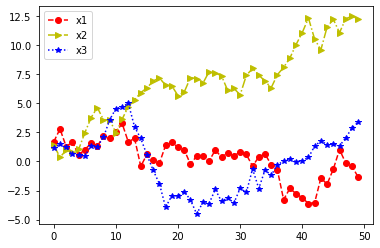

In [24]:
'''
    颜色  color:修改颜色，可以简写成c
    样式  linestyle='--' 修改线条的样式 可以简写成 ls
    标注  marker : 标注
    线宽  linewidth: 设置线宽 可以简写成 lw   （lw=2）
    
'''
x1 = np.random.randn(50)   # cumsum()作用是累加和
x2 = np.random.randn(50)
x3 = np.random.randn(50)
plt.plot(x1.cumsum(),c='r',linestyle='--',marker='o')
plt.plot(x2.cumsum(),c='y',linestyle='-.',marker='>')
plt.plot(x3.cumsum(),c='b',linestyle=':',marker='*')
plt.legend(['x1','x2','x3'])   # 显示图例
plt.show()
